In [1]:
from IPython.display import clear_output
import numpy as np
from time import sleep
import math
from scipy import ndimage
from scipy import misc
import random
import matplotlib.pyplot as plt

class Puzzle:
    __imagen = misc.face()
    original = None
    imagen_actual = None
    piezas = None
    division_eje_x = 4
    division_eje_y = 4
    auxiliar = None
    error = ""

    
    def __init__(self):
        self.__imagen = misc.face()
        y1, y2, y3, y4 = np.vsplit(self.__imagen, self.division_eje_y)
        self.original = np.array([np.hsplit(y1, self.division_eje_x), np.hsplit(y2, self.division_eje_x), np.hsplit(y3, self.division_eje_x), np.hsplit(y4, self.division_eje_x)])
        self.piezas = self.original.copy()
        self.imagen_actual = np.zeros_like(self.original)
        self.crear_juego()
        self.armar_rompecabezas()
    
    
    def crear_juego(self):
        numero_de_piezas = self.division_eje_x * self.division_eje_y
        posiciones_iniciales = random.sample(range(numero_de_piezas), numero_de_piezas)
        contador = 0
        for posicion in posiciones_iniciales:
            self.imagen_actual[int(contador/self.division_eje_x), contador%self.division_eje_x] = self.piezas[int(posicion/self.division_eje_x), posicion%self.division_eje_x,:,:,:]
            contador = contador + 1
    
    
    def imprimir_rompecabezas(self):
        juego = np.vstack([np.hstack(self.imagen_actual[0,:,:,:,:]), np.hstack(self.imagen_actual[1,:,:,:,:]), np.hstack(self.imagen_actual[2,:,:,:,:]), np.hstack(self.imagen_actual[3,:,:,:,:])]) 
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))                 
        axes[0].imshow(juego)
        axes[1].imshow(self.__imagen)
        fig.tight_layout()
    
    
    def intercambiar(self, inicial, final):
        auxiliar = np.copy(self.imagen_actual[int(inicial/self.division_eje_x), inicial%self.division_eje_x])
        self.imagen_actual[int(inicial/self.division_eje_x), inicial%self.division_eje_x] = self.imagen_actual[int(final/self.division_eje_x), final%self.division_eje_x]                  
        self.imagen_actual[int(final/self.division_eje_x), final%self.division_eje_x] = np.copy(auxiliar)
        
        
    def armar_rompecabezas(self):
        while True:
            clear_output()
            if self.error == "":
                pass
            else:
                print(self.error)
            self.error = ""
            self.imprimir_rompecabezas()
            plt.pause(1)
            
            try:
                inicial = int(input("Ingrese la posicion de la pieza que desea mover: "))
                final = int(input("Ingrese la posicion a la que desea mover la pieza: "))
            except Exception:
                self.error = "hHa ingresado un numero incorrecto"
                continue
            
            if inicial < 0 or inicial > 15 or final < 0 or final > 15:
                self.error = "Debe ingresar como posicion un numero entre 0 y 15"
            
            else:
                self.intercambiar(inicial, final)
            
            if np.array_equal(self.imagen_actual, self.original):
                break
                
        clear_output()
        print("Completado con exito")
        self.imprimir_rompecabezas()

    

<h2>LAS POSICIONES SON:</h2> 
   <h2> 0--1--2--3</h2> 
   <h2> 4--5--6--7</h2>
   <h2> 8--9--10--11</h2>
    <h2>12--13--14--15</h2>

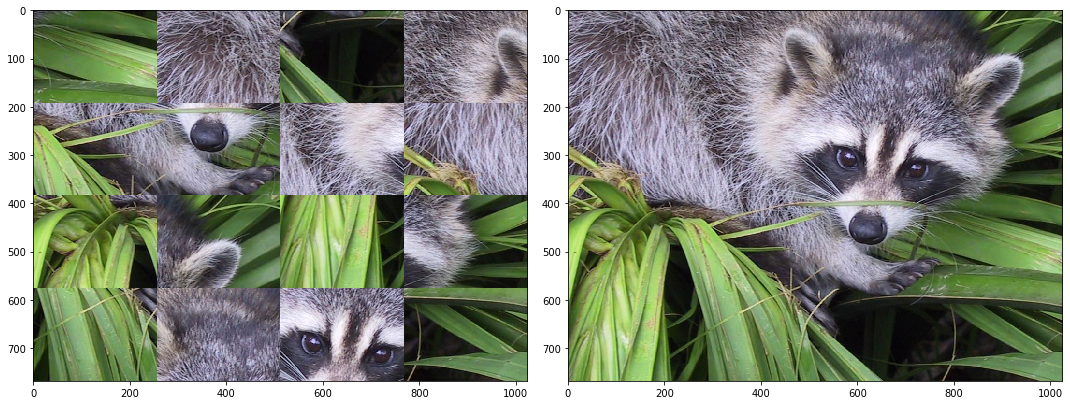

In [ ]:
rompe = Puzzle()